In [ ]:
# Load the required packages
# Regular expressions
import re

# Unidecoder
import unicodedata

# Timestamp / time measurment
import time

# Simpletransformers classifier
from simpletransformers.classification import ClassificationModel

# Softmax function for predicted probabiliy calculation
from scipy.special import softmax

# PyTorch: enable GPU access
import torch

# If you want to select a specific GPU, set it here:
# gpu = 0
# torch.cuda.set_device(gpu)

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use GPU {}:'.format(torch.cuda.current_device()), torch.cuda.get_device_name(torch.cuda.current_device()))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use GPU 0: NVIDIA GeForce GTX 1080 Ti


In [ ]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/users/mhossain/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/users/mhossain/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/users/mhossain/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Preprocessing function
def denoise_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    text  =  re.sub('\[[^]]*\]', '', text)
    text = re.sub(r'_+', ' ', text)
    text =re.sub(r'\s{2,}', ' ', text)
    # Tokenize
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    words = ' '.join([lemmatizer.lemmatize(word) for word in words])
    return words

In [ ]:
# Load the text data
data =pd.read_csv("/home/users/mhossain/projects/cards/fit/roberta/pub_texts.csv")
print('{} paragraphs were loaded. Here are the first few rows of the data:'.format(len(data)))
data.head()

405033 paragraphs were loaded. Here are the first few rows of the data:


,pub_text
0,"Yes, EV:s are happening. I would agree with yo..."
1,"It's not news, but it is very much part of a m..."
2,\nClimate change has a variety of consequences...
3,No clue. Cultural change is difficult and slow...
4,Then how do you bring up the issue of climate ...


In [ ]:
# Pre-process the text
data['text_denoised'] = data['pub_text'].astype(str).apply(denoise_text)

In [ ]:
print('{} paragraphs were loaded. Here are the first few rows of the data:'.format(len(data)))

405033 paragraphs were loaded. Here are the first few rows of the data:


In [ ]:
data = data.drop_duplicates()
data

,pub_text,text_denoised
0,"Yes, EV:s are happening. I would agree with yo...",yes ev happening would agree one normal ev car...
1,"It's not news, but it is very much part of a m...",news much part measure news based subreddit hi...
2,\nClimate change has a variety of consequences...,climate change variety consequence perfect exa...
3,No clue. Cultural change is difficult and slow...,clue cultural change difficult slow effect kno...
4,Then how do you bring up the issue of climate ...,bring issue climate change one acknowledge exi...
...,...,...
405027,<title> The chairman of the Intergovernmental ...,title chairman intergovernmental panel climate...
405028,<title> World Leaders on Climate Change 2<text...,title world leader climate change text removed
405029,<title> This desperate problem which is being ...,title desperate problem largely ignored moment...
405031,<title> Feeling the Heat: Climate Change Has B...,title feeling heat climate change become reali...


In [ ]:
data = data.dropna()
data

,pub_text,text_denoised
0,"Yes, EV:s are happening. I would agree with yo...",yes ev happening would agree one normal ev car...
1,"It's not news, but it is very much part of a m...",news much part measure news based subreddit hi...
2,\nClimate change has a variety of consequences...,climate change variety consequence perfect exa...
3,No clue. Cultural change is difficult and slow...,clue cultural change difficult slow effect kno...
4,Then how do you bring up the issue of climate ...,bring issue climate change one acknowledge exi...
...,...,...
405027,<title> The chairman of the Intergovernmental ...,title chairman intergovernmental panel climate...
405028,<title> World Leaders on Climate Change 2<text...,title world leader climate change text removed
405029,<title> This desperate problem which is being ...,title desperate problem largely ignored moment...
405031,<title> Feeling the Heat: Climate Change Has B...,title feeling heat climate change become reali...


In [ ]:
data_sample = data[:50000]

In [ ]:
data_sample

,pub_text,text_denoised
0,"Yes, EV:s are happening. I would agree with yo...",yes ev happening would agree one normal ev car...
1,"It's not news, but it is very much part of a m...",news much part measure news based subreddit hi...
2,\nClimate change has a variety of consequences...,climate change variety consequence perfect exa...
3,No clue. Cultural change is difficult and slow...,clue cultural change difficult slow effect kno...
4,Then how do you bring up the issue of climate ...,bring issue climate change one acknowledge exi...
...,...,...
51332,"&gt; Name three species, not sub-species like ...",gt name three specie subspecies like shortyell...
51333,&gt;Kulke writes that not only is the CO2-scie...,gtkulke writes coscience explaining climate ch...
51334,"Okay, I wasn't going to answer you at all, but...",okay wasnt going answer ive changed mind diffi...
51335,&gt;Extinction of species is harm in the eyes ...,gtextinction specie harm eye educated people e...


In [ ]:
data_sample = list(data_sample.text_denoised)

In [ ]:
type(data_sample)

list

In [ ]:
from bertopic import BERTopic

In [ ]:
topic_model = BERTopic()

In [ ]:
topics, probabilities = topic_model.fit_transform(data_sample)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [ ]:
len(data_sample)

50000

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,32328,-1_climate_change_people_co,"[climate, change, people, co, dont, like, scie...",[let go fun shall gt step stop making predicti...
1,0,867,0_snow_weather_winter_cold,"[snow, weather, winter, cold, extreme, summer,...",[fair amp balancedtm reporting list failed cli...
2,1,679,1_fire_forest_arson_wildfire,"[fire, forest, arson, wildfire, australia, bus...",[thing may well getting warmer may make thing ...
3,2,539,2_alarmist_alarmism_alarm_climate,"[alarmist, alarmism, alarm, climate, change, a...",[almost climate change alarmism nothing scienc...
4,3,482,3_deny_real_believe_denier,"[deny, real, believe, denier, joke, denies, ch...",[gt nobody denies climate change nice try yes ...
...,...,...,...,...,...
314,313,10,313_fossil_fuel_httpswwwgooglecomampsampthegua...,"[fossil, fuel, httpswwwgooglecomampsamptheguar...",[fossil fuel lobbying group thing lot misinfor...
315,314,10,314_reputable_quote_paper_publishedgoogle,"[reputable, quote, paper, publishedgoogle, tha...",[provide reliable source prof genuinely intere...
316,315,10,315_chart_data_record_ushcn,"[chart, data, record, ushcn, graph, uscrn, tre...",[gtyoure making sense chart cutoff highest pea...
317,316,10,316_rome_enemy_club_humanity,"[rome, enemy, club, humanity, pollenizing, pop...",[know entire agw climate change thing total fr...


In [ ]:
len(topics)

50000

In [ ]:
frequency = topic_model.get_topic_freq()

In [ ]:
frequency

,Topic,Count
2,-1,33246
65,0,652
80,1,442
136,2,407
41,3,378
...,...,...
129,317,10
255,318,10
206,319,10
277,320,10


In [ ]:
topic_model.reduce_topics(data_sample_list, nr_topics=18)

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,33246,-1_climate_change_people_year,"[climate, change, people, year, warming, co, d...",[first dont deny climate change denier pejorat...
1,0,10582,0_climate_change_people_science,"[climate, change, people, science, like, dont,...",[several comment well worth reading top commen...
2,1,3363,1_temperature_co_climate_change,"[temperature, co, climate, change, year, warmi...",[gtbut compare cooling warming straw man argum...
3,2,916,2_tree_meat_carbon_plant,"[tree, meat, carbon, plant, vegan, food, chang...",[firstly perfectly healthy live vegan diet sim...
4,3,540,3_sea_level_rise_coral,"[sea, level, rise, coral, reef, ocean, year, p...",[continuation gornitz v sealevel rise review r...
5,4,354,4_bot_gt_faqhttpnpredditcomrautotldrcommentsbf...,"[bot, gt, faqhttpnpredditcomrautotldrcommentsb...",[best tldr could make originalhttpwwwhuffingto...
6,5,210,5_carbon_dividend_voting_tax,"[carbon, dividend, voting, tax, volunteer, fee...",[consensus among scientistshttpbushtamueduistp...
7,6,187,6_video_climate_podcast_change,"[video, climate, podcast, change, attenborough...",[look like video tagged automated algorithm ba...
8,7,152,7_bear_polar_change_climate,"[bear, polar, change, climate, population, pen...",[gt one three source support claim climate cha...
9,8,135,8_climate_scientist_science_career,"[climate, scientist, science, career, field, c...",[someone since high school decided dedicate ca...


In [ ]:
topic_model.get_topic_info()["Representation"][17]

['fart',
 'methane',
 'farce',
 'unicorn',
 'decay',
 'change',
 'gas',
 'climate',
 'smoke',
 'cent']

In [ ]:
len(topic_model.topics_)

50000

In [ ]:
# Create a DataFrame from your text data list
df = pd.DataFrame({'Text': data_sample_list})

In [ ]:
from collections import defaultdict as dd
text2topic_num = dd(int)
for i, topic_num in enumerate(topic_model.topics_):
    text = data_sample_list[i]
    text2topic_num[text] = topic_num


In [ ]:
# Assuming df is defined and has a 'Text' column
df['topic_num'] = df['Text'].map(text2topic_num)

In [ ]:
df['topic_num'].isna().sum()

0

In [ ]:
len(df)

50000

In [ ]:
# Convert the defaultdict to a DataFrame
df = pd.DataFrame(list(text2topic_num.items()), columns=['Text', 'Topic Number'])

# Display the DataFrame
df

,Text,Topic Number
0,yes ev happening would agree one normal ev car...,0
1,news much part measure news based subreddit hi...,0
2,climate change variety consequence perfect exa...,-1
3,clue cultural change difficult slow effect kno...,-1
4,bring issue climate change one acknowledge exi...,-1
...,...,...
49936,gt name three specie subspecies like shortyell...,-1
49937,gtkulke writes coscience explaining climate ch...,1
49938,okay wasnt going answer ive changed mind diffi...,-1
49939,gtextinction specie harm eye educated people e...,3


## We will assign topic labels for these 17 topics.

In [ ]:
label_to_topic = {
    -1: 'No Claim',
    0: 'Climate Change Perception and Public Opinion',
    1: 'Global Climate Change and Environmental Impact',
    2: 'Sustainable Diets and Climate Change Mitigation',
    3: 'Oceanic Changes and Sea Level Rise',
    4: 'Automated Summary Tools and Feedback Systems',
    5: 'Carbon Tax Policy and Civic Engagement',
    6: 'Climate Change Media and Public Figures',
    7: 'Impact of Climate Change on Polar Wildlife',
    8: 'Careers in Climate Science and Geology',
    9: 'Climate Change Litigation and Insurance',
    10: 'Systemic Change and Collective Action on Climate',
    11: 'Climate Change and Personal Transportation Choices',
    12: 'Perception and Reality of Climate Change',
    13: 'Planetary Climates and Comparative Astronomy',
    14: 'Scientific Integrity and Accusations of Fraud',
    15: 'Climate Change Media Coverage and Scientific Communication',
    16: 'Satirical or Humorous Takes on Climate Change and Methane Emissions',
}

# Apply the mapping to create a new column with the mapped claim
df['Mapped_Topic'] = df['Topic Number'].map(label_to_topic)

In [ ]:
df

,Text,Topic Number,Mapped_Topic
0,yes ev happening would agree one normal ev car...,0,Climate Change Perception and Public Opinion
1,news much part measure news based subreddit hi...,0,Climate Change Perception and Public Opinion
2,climate change variety consequence perfect exa...,-1,No Claim
3,clue cultural change difficult slow effect kno...,-1,No Claim
4,bring issue climate change one acknowledge exi...,-1,No Claim
...,...,...,...
49936,gt name three specie subspecies like shortyell...,-1,No Claim
49937,gtkulke writes coscience explaining climate ch...,1,Global Climate Change and Environmental Impact
49938,okay wasnt going answer ive changed mind diffi...,-1,No Claim
49939,gtextinction specie harm eye educated people e...,3,Oceanic Changes and Sea Level Rise


In [ ]:
df_new= df[df['Topic Number']!=-1]

In [ ]:
df_new

,Text,Topic Number,Mapped_Topic
0,yes ev happening would agree one normal ev car...,0,Climate Change Perception and Public Opinion
1,news much part measure news based subreddit hi...,0,Climate Change Perception and Public Opinion
6,rule violation post report news speculation th...,0,Climate Change Perception and Public Opinion
11,gtstill going eat animal feed shipped know rig...,2,Sustainable Diets and Climate Change Mitigation
21,yes know heat dome im also canada im ab hit hi...,0,Climate Change Perception and Public Opinion
...,...,...,...
49926,even nefarious back wide range source cant rea...,0,Climate Change Perception and Public Opinion
49928,term climate change always arround think find ...,0,Climate Change Perception and Public Opinion
49929,funny coming cleric brought isnt global warmin...,0,Climate Change Perception and Public Opinion
49937,gtkulke writes coscience explaining climate ch...,1,Global Climate Change and Environmental Impact


In [ ]:
df_reduced = df_new.sample(n=13991, random_state=42)  # random_state ensures reproducibility
df_reduced

,Text,Topic Number,Mapped_Topic
46313,climate change alarmist going ever get way des...,0,Climate Change Perception and Public Opinion
29706,yeah lol heard boat full documentary maker cli...,1,Global Climate Change and Environmental Impact
2261,short answer unprecedented drought crop failur...,2,Sustainable Diets and Climate Change Mitigation
37571,doesnt come much anymore act bored wait topic ...,0,Climate Change Perception and Public Opinion
40369,see also articlehttpwwwfinancialpostcommwpfpco...,1,Global Climate Change and Environmental Impact
...,...,...,...
49685,haha still question guy really dont get qualif...,0,Climate Change Perception and Public Opinion
24221,first mill ha still far far short mill ha fire...,1,Global Climate Change and Environmental Impact
38961,gtthe center disease control quietly canceled ...,0,Climate Change Perception and Public Opinion
34398,bored seriously one dumbest subreddits general...,0,Climate Change Perception and Public Opinion


In [ ]:
df_reduced.to_csv("Mapped_Topic.csv",index =False)

In [ ]:
# Load the file
file_path = '/home/users/mhossain/projects/cards/fit/roberta/model_label_claim.csv'
data_claim = pd.read_csv(file_path)

# Display the first few rows to understand its structure
data_claim


,pub_text,text_denoised,RoBERTa_pred_label,Mapped_Claim
0,Because the climate is also effected by natura...,climate also effected natural effect like sola...,7,It is natural cycles/variation
1,I was reading an article earlier about a team ...,reading article earlier team australia able sp...,10,Species/plants/reefs are not showing climate i...
2,"Renewables are a mix, wind remains on par or b...",renewables mix wind remains par nuclear data p...,14,Clean energy technology/biofuels won’t work
3,&gt; economic growth has been decoupled from r...,gt economic growth decoupled rising carbon emi...,12,Climate policies (mitigation or adaptation) ar...
4,Windfarms and solar are the most effective ove...,windfarms solar effective large area case spac...,14,Clean energy technology/biofuels won’t work
...,...,...,...,...
13986,while the term climate change was always arrou...,term climate change always arround think find ...,17,Climate movement is unreliable/alarmist/corrupt
13987,&gt; What part of the article do you think he ...,gt part article think james delingpole doesnt ...,17,Climate movement is unreliable/alarmist/corrupt
13988,you are like a rude version of a ~~global warm...,like rude version global warmingclimate change...,17,Climate movement is unreliable/alarmist/corrupt
13989,&gt;Kulke writes that not only is the CO2-scie...,gtkulke writes coscience explaining climate ch...,7,It is natural cycles/variation


In [ ]:
# Load the file
file_path = '/home/users/mhossain/projects/cards/fit/roberta/Mapped_Topic.csv'
data_topic = pd.read_csv(file_path)

# Display the first few rows to understand its structure
data_topic


,Text,Topic Number,Mapped_Topic
0,climate change alarmist going ever get way des...,0,Climate Change Perception and Public Opinion
1,yeah lol heard boat full documentary maker cli...,1,Global Climate Change and Environmental Impact
2,short answer unprecedented drought crop failur...,2,Sustainable Diets and Climate Change Mitigation
3,doesnt come much anymore act bored wait topic ...,0,Climate Change Perception and Public Opinion
4,see also articlehttpwwwfinancialpostcommwpfpco...,1,Global Climate Change and Environmental Impact
...,...,...,...
13986,haha still question guy really dont get qualif...,0,Climate Change Perception and Public Opinion
13987,first mill ha still far far short mill ha fire...,1,Global Climate Change and Environmental Impact
13988,gtthe center disease control quietly canceled ...,0,Climate Change Perception and Public Opinion
13989,bored seriously one dumbest subreddits general...,0,Climate Change Perception and Public Opinion


In [ ]:
# Select specific columns from the first DataFrame
selected_columns_df1 = data_claim[['pub_text', 'text_denoised','Mapped_Claim',]]  # Replace with actual column names

# Select specific columns from the second DataFrame
selected_columns_df2 = data_topic[['Text', 'Mapped_Topic']]  # Replace with actual column names


In [ ]:
# Combine columns from df1 and df2 side by side
new_df = pd.concat([selected_columns_df1, selected_columns_df2], axis=1)
new_df

,pub_text,text_denoised,Mapped_Claim,Text,Mapped_Topic
0,Because the climate is also effected by natura...,climate also effected natural effect like sola...,It is natural cycles/variation,climate change alarmist going ever get way des...,Climate Change Perception and Public Opinion
1,I was reading an article earlier about a team ...,reading article earlier team australia able sp...,Species/plants/reefs are not showing climate i...,yeah lol heard boat full documentary maker cli...,Global Climate Change and Environmental Impact
2,"Renewables are a mix, wind remains on par or b...",renewables mix wind remains par nuclear data p...,Clean energy technology/biofuels won’t work,short answer unprecedented drought crop failur...,Sustainable Diets and Climate Change Mitigation
3,&gt; economic growth has been decoupled from r...,gt economic growth decoupled rising carbon emi...,Climate policies (mitigation or adaptation) ar...,doesnt come much anymore act bored wait topic ...,Climate Change Perception and Public Opinion
4,Windfarms and solar are the most effective ove...,windfarms solar effective large area case spac...,Clean energy technology/biofuels won’t work,see also articlehttpwwwfinancialpostcommwpfpco...,Global Climate Change and Environmental Impact
...,...,...,...,...,...
13986,while the term climate change was always arrou...,term climate change always arround think find ...,Climate movement is unreliable/alarmist/corrupt,haha still question guy really dont get qualif...,Climate Change Perception and Public Opinion
13987,&gt; What part of the article do you think he ...,gt part article think james delingpole doesnt ...,Climate movement is unreliable/alarmist/corrupt,first mill ha still far far short mill ha fire...,Global Climate Change and Environmental Impact
13988,you are like a rude version of a ~~global warm...,like rude version global warmingclimate change...,Climate movement is unreliable/alarmist/corrupt,gtthe center disease control quietly canceled ...,Climate Change Perception and Public Opinion
13989,&gt;Kulke writes that not only is the CO2-scie...,gtkulke writes coscience explaining climate ch...,It is natural cycles/variation,bored seriously one dumbest subreddits general...,Climate Change Perception and Public Opinion


In [ ]:
new_df.to_csv('new_file.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Assuming your DataFrame is named df and it contains 'Mapped_Claim' and 'Mapped_Topic' columns
# Also, assuming df is already filtered to 13,991 rows

# Step 1: Convert Text to Vectors using TfidfVectorizer
vectorizer = TfidfVectorizer()

# Combine the text from both columns to fit the vectorizer on the combined vocabulary
combined_text = new_df['Mapped_Claim'] + " " + new_df['Mapped_Topic']
vectorizer.fit(combined_text)

# Transform the individual columns into vectors
claim_vectors = vectorizer.transform(new_df['Mapped_Claim'])
topic_vectors = vectorizer.transform(new_df['Mapped_Topic'])

# Step 2: Compute Cosine Similarity between each pair of vectors
cos_similarities = cosine_similarity(claim_vectors, topic_vectors)

# Since we want the cosine similarity for each pair of corresponding rows,
# we extract the diagonal of the resulting matrix
cosine_sim = cos_similarities.diagonal()

# Step 3: Add the cosine similarity values to the DataFrame as a new column
new_df['cosine_similarity'] = cosine_sim

# Display the DataFrame with the new column
new_df.head(20)


,pub_text,text_denoised,Mapped_Claim,Text,Mapped_Topic,cosine_similarity
0,Because the climate is also effected by natura...,climate also effected natural effect like sola...,It is natural cycles/variation,climate change alarmist going ever get way des...,Climate Change Perception and Public Opinion,0.000000
1,I was reading an article earlier about a team ...,reading article earlier team australia able sp...,Species/plants/reefs are not showing climate i...,yeah lol heard boat full documentary maker cli...,Global Climate Change and Environmental Impact,0.037767
2,"Renewables are a mix, wind remains on par or b...",renewables mix wind remains par nuclear data p...,Clean energy technology/biofuels won’t work,short answer unprecedented drought crop failur...,Sustainable Diets and Climate Change Mitigation,0.000000
3,&gt; economic growth has been decoupled from r...,gt economic growth decoupled rising carbon emi...,Climate policies (mitigation or adaptation) ar...,doesnt come much anymore act bored wait topic ...,Climate Change Perception and Public Opinion,0.033576
4,Windfarms and solar are the most effective ove...,windfarms solar effective large area case spac...,Clean energy technology/biofuels won’t work,see also articlehttpwwwfinancialpostcommwpfpco...,Global Climate Change and Environmental Impact,0.000000
5,&gt; We can't generate enough electricity to m...,gt cant generate enough electricity meet deman...,Clean energy technology/biofuels won’t work,gt agree mosquito real know mosquito carry dea...,Climate Change Perception and Public Opinion,0.000000
6,"I understand that, but I would also point out ...",understand would also point offset solve clima...,Clean energy technology/biofuels won’t work,guy knew professional like combating effect cl...,Oceanic Changes and Sea Level Rise,0.000000
7,since you were a coward and reported my last c...,since coward reported last comment policy isnt...,Climate policies (mitigation or adaptation) ar...,krpelin say manmade global warming fake effect...,Climate Change Perception and Public Opinion,0.033576
8,Because we need to actually stop emissions bef...,need actually stop emission sequestering carbo...,Clean energy technology/biofuels won’t work,article completely stupid put subreddit suppos...,Global Climate Change and Environmental Impact,0.000000
9,I think it’s not ready for price time yet. How...,think ready price time yet however disagree lo...,Clean energy technology/biofuels won’t work,gt there punishment push europe eat meat much ...,Climate Change Perception and Public Opinion,0.000000


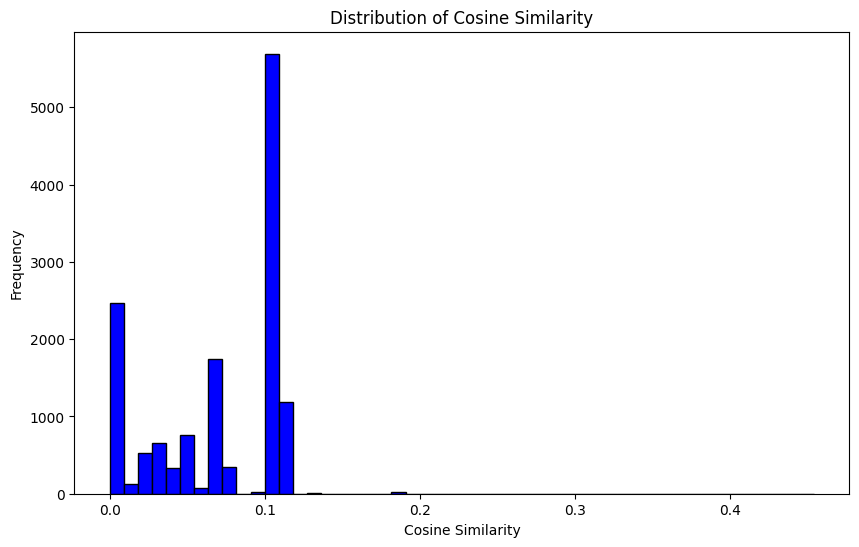

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(new_df['cosine_similarity'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Cosine Similarity')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.show()


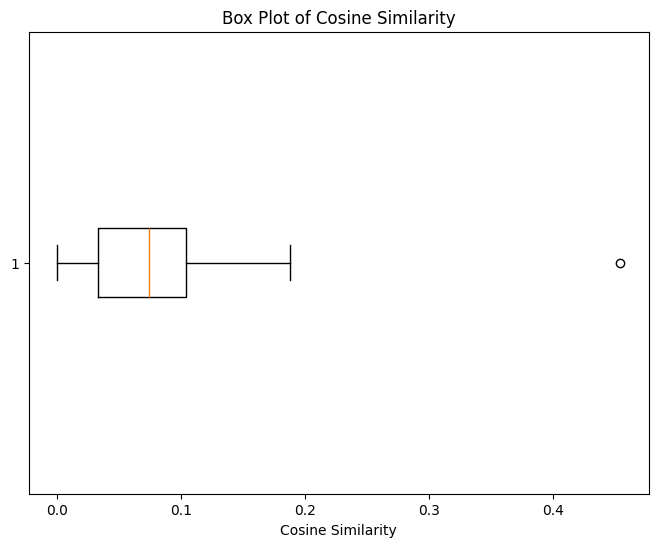

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(new_df['cosine_similarity'], vert=False)
plt.title('Box Plot of Cosine Similarity')
plt.xlabel('Cosine Similarity')
plt.show()


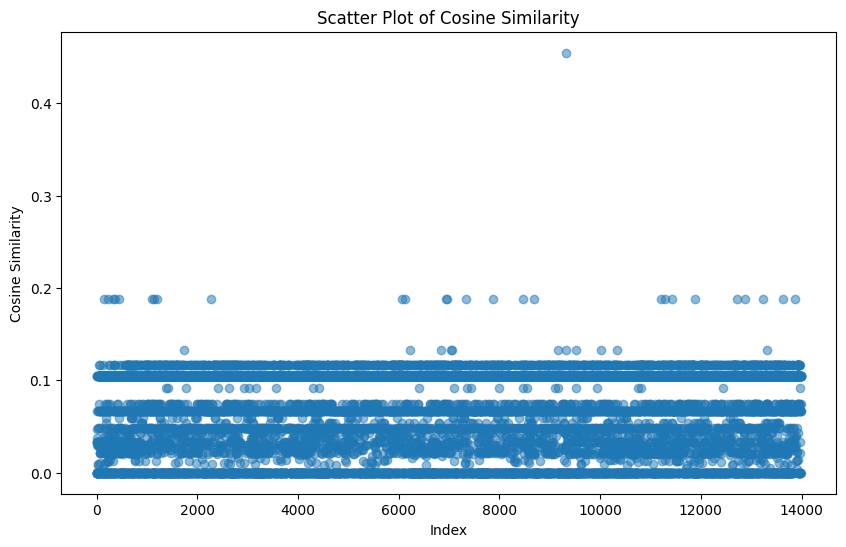

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(new_df)), new_df['cosine_similarity'], alpha=0.5)
plt.title('Scatter Plot of Cosine Similarity')
plt.xlabel('Index')
plt.ylabel('Cosine Similarity')
plt.show()
